# Introduction
### Dataset Description 

In this dataset, we'll be analyzing a little over 1k death count focusing on The highest number of death count and the gender that most affected by the diseases


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
df = pd.read_csv("csv-1.csv")
df

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,06/24/2020,02/01/2020,06/20/2020,United States,All,Under 1 year,9.0,6504.0,59.0,2.0,14.0,80.0,NaN
1,06/24/2020,02/01/2020,06/20/2020,United States,All,1-4 years,6.0,1259.0,46.0,2.0,40.0,90.0,NaN
2,06/24/2020,02/01/2020,06/20/2020,United States,All,5-14 years,13.0,1859.0,61.0,3.0,46.0,117.0,NaN
3,06/24/2020,02/01/2020,06/20/2020,United States,All,15-24 years,132.0,11608.0,235.0,45.0,51.0,369.0,NaN
4,06/24/2020,02/01/2020,06/20/2020,United States,All,25-34 years,732.0,24675.0,885.0,327.0,146.0,1423.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,06/24/2020,02/01/2020,06/20/2020,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1412,06/24/2020,02/01/2020,06/20/2020,Puerto Rico,Female,85 years and over,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1413,06/24/2020,02/01/2020,06/20/2020,Puerto Rico,Female,All ages,NaN,358.0,39.0,NaN,NaN,43.0,One or more data cells have counts between 1–9...
1414,06/24/2020,02/01/2020,06/20/2020,Puerto Rico,Unknown,All ages,0.0,0.0,0.0,0.0,0.0,0.0,NaN


# Data wrangling
### General Properties


In [37]:
df.shape

(1416, 13)

In [38]:
df['State'].nunique()

108

In [39]:
df['Sex'].nunique()

4

In [40]:
df['Age group'].nunique()

13

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                1416 non-null   object 
 1   Start week                                1416 non-null   object 
 2   End Week                                  1416 non-null   object 
 3   State                                     1416 non-null   object 
 4   Sex                                       1416 non-null   object 
 5   Age group                                 1416 non-null   object 
 6   COVID-19 Deaths                           1133 non-null   float64
 7   Total Deaths                              1274 non-null   float64
 8   Pneumonia Deaths                          1093 non-null   float64
 9   Pneumonia and COVID-19 Deaths             1128 non-null   float64
 10  Influenza Deaths                    

# Data Cleaning

In [42]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

We added (_) to the columns to make it easer to deal with the data

In [43]:
# we changed some details in columns names
df.rename(columns={'COVID-19_Deaths':'COVID_19_Deaths'}, inplace=True)
df.rename(columns={'Pneumonia_and_COVID-19_Deaths':'Pneumonia_and_COVID_19_Deaths'}, inplace=True)
df.rename(columns={'Pneumonia,_Influenza,_or_COVID-19_Deaths':'Pneumonia,_Influenza,_or_COVID_19_Deaths'}, inplace=True)

In [44]:
df.head(1)

,Data_as_of,Start_week,End_Week,State,Sex,Age_group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,"Pneumonia,_Influenza,_or_COVID_19_Deaths",Footnote
0,06/24/2020,02/01/2020,06/20/2020,United States,All,Under 1 year,9.0,6504.0,59.0,2.0,14.0,80.0,NaN


In [45]:
df.drop(['Data_as_of', 'Start_week', 'End_Week', 'Footnote', 'Pneumonia,_Influenza,_or_COVID_19_Deaths', 'Pneumonia_and_COVID_19_Deaths'], axis=1, inplace=True)

We dropped the columns that we won't use in analyzing

In [46]:
df.fillna(0, inplace=True)

In [47]:
df.COVID_19_Deaths = df.COVID_19_Deaths.astype(int)
df.Total_Deaths = df.Total_Deaths.astype(int)
df.Pneumonia_Deaths = df.Pneumonia_Deaths.astype(int)
df.Influenza_Deaths = df.Influenza_Deaths.astype(int)

Change some columns data types to make it more logical

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             1416 non-null   object
 1   Sex               1416 non-null   object
 2   Age_group         1416 non-null   object
 3   COVID_19_Deaths   1416 non-null   int32 
 4   Total_Deaths      1416 non-null   int32 
 5   Pneumonia_Deaths  1416 non-null   int32 
 6   Influenza_Deaths  1416 non-null   int32 
dtypes: int32(4), object(3)
memory usage: 55.4+ KB


In [49]:
df.head(1)

,State,Sex,Age_group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Influenza_Deaths
0,United States,All,Under 1 year,9,6504,59,14


We dropped data the we won't use 

## Exploratory Data Analysis and Data Visualization


# Which states that have the highest number of total deaths and the states that have the lowest total deaths?

In [50]:
df["Total_Deaths"].max()

1215516

In [51]:
df.groupby(['State'], sort=False)['Total_Deaths'].max()

State
United States          1215516
United States Total    1215516
Alabama                  10911
Alabama Total            21123
Alaska                     878
                        ...   
Wisconsin Total          22040
Wyoming                    975
Wyoming Total             1818
Puerto Rico                759
Puerto Rico Total         1117
Name: Total_Deaths, Length: 108, dtype: int32

In [52]:
df.query('Total_Deaths == 1215516')


,State,Sex,Age_group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Influenza_Deaths
11,United States,All,All Ages,107997,1215516,117814,6444
37,United States Total,All,All Ages,107997,1215516,117814,6444


The United States has 1215516  number of deaths

In [53]:
df["Total_Deaths"].min()

0

In [54]:
min_total_death = df.query('Total_Deaths == 0')
min_total_death.nunique()

State               53
Sex                  3
Age_group           10
COVID_19_Deaths      1
Total_Deaths         1
Pneumonia_Deaths     1
Influenza_Deaths     1
dtype: int64

A lot of states have the lowest number of death counts 

# Which age has the highest total deaths, covid19 deaths, Influenza_Deaths and Pneumonia_Deaths?

In [55]:
df.Age_group.nunique()

13

In [56]:
df.Age_group.value_counts()

All ages             162
15-24 years          109
Under 1 year         109
65-74 years          109
1-4 years            109
45-54 years          109
35-44 years          109
25-34 years          109
75-84 years          109
85 years and over    109
55-64 years          109
5-14 years           109
All Ages              55
Name: Age_group, dtype: int64

Here we can realise that there's two to variables of (all ages) , it's better to drop that rows to analyze the reast of age group

In [57]:
df_copy = df.copy()
df_copy.head()

,State,Sex,Age_group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Influenza_Deaths
0,United States,All,Under 1 year,9,6504,59,14
1,United States,All,1-4 years,6,1259,46,40
2,United States,All,5-14 years,13,1859,61,46
3,United States,All,15-24 years,132,11608,235,51
4,United States,All,25-34 years,732,24675,885,146


We created a copy from the oridinal dataframe so that we can do some changes comfortably

In [58]:
df_copy.drop(df_copy.index[df_copy['Age_group'] == 'All ages'], inplace = True)

In [59]:
df_copy.drop(df_copy.index[df_copy['Age_group'] == 'All Ages'], inplace = True)

Dropped any variables except females and males

In [60]:
df_copy.Age_group.value_counts()

15-24 years          109
35-44 years          109
25-34 years          109
Under 1 year         109
65-74 years          109
75-84 years          109
85 years and over    109
1-4 years            109
45-54 years          109
55-64 years          109
5-14 years           109
Name: Age_group, dtype: int64

In [61]:
df_total=df_copy.groupby('Age_group')['Total_Deaths'].max()

<AxesSubplot:ylabel='Age_group'>

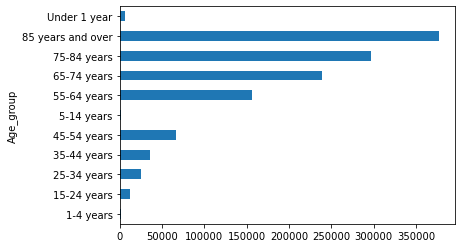

In [62]:
df_total.plot(kind="barh", fontsize=10)

85 years and over were (376456) death counts    

1-4 years were (1259) death counts           

In [65]:
df_Pneumonia = df_copy.groupby('Age_group')['Pneumonia_Deaths'].max()

<AxesSubplot:ylabel='Age_group'>

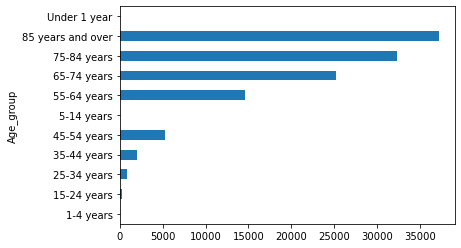

In [66]:
df_Pneumonia.plot(kind="barh", fontsize=10)

85 years old and over were (37172) death counts

1-4 years were (46) death counts


In [68]:
df_Influenza = df_copy.groupby('Age_group')['Influenza_Deaths'].max()

<AxesSubplot:ylabel='Age_group'>

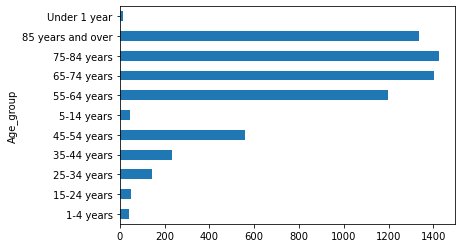

In [69]:
df_Influenza.plot(kind="barh", fontsize=10)

75-84 years old were (1423) death count

Under 1 year were (14) death count


In [70]:
df_COVID_19 = df_copy.groupby('Age_group')['COVID_19_Deaths'].max()

<AxesSubplot:ylabel='Age_group'>

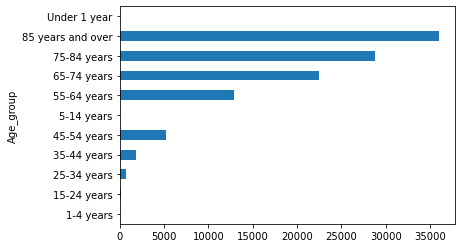

In [71]:
df_COVID_19.plot(kind="barh", fontsize=10)

85 years and over were 35948 death count

1-4 years old were 6 death count


# #  Which gender has the highest total death counts?

In [72]:
df_copy.Sex.value_counts()

Female    594
Male      594
All        11
Name: Sex, dtype: int64

We will drop the (all) rows temporary 

In [73]:
df_copy.drop(df_copy.index[df_copy['Sex'] == 'All'], inplace = True)

In [74]:
df_copy.Sex.value_counts()

Female    594
Male      594
Name: Sex, dtype: int64

In [75]:
df_total = df_copy.groupby('Sex')['Total_Deaths'].max()
df_total

Sex
Female    231482
Male      154110
Name: Total_Deaths, dtype: int32

<AxesSubplot:>

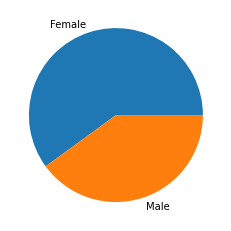

In [76]:
df_total.plot(kind="pie", label="")

The highest total death counts was for Females and it was 231482 death counts

# Which gender has the highest covid19 , Influenza, Pneumonia Death counts?

In [77]:
df_Pneumonia = df_copy.groupby('Sex')['Pneumonia_Deaths'].max()
df_Pneumonia

Sex
Female    20960
Male      17942
Name: Pneumonia_Deaths, dtype: int32

<AxesSubplot:>

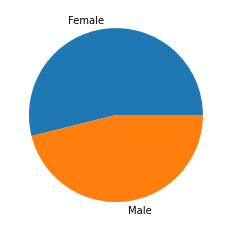

In [78]:
df_Pneumonia.plot(kind="pie", label="")

The highest Pneumonia death counts was for Females and it was 20960 death counts

In [79]:
df_Influenza = df_copy.groupby('Sex')['Influenza_Deaths'].max()
df_Influenza

Sex
Female    791
Male      778
Name: Influenza_Deaths, dtype: int32

<AxesSubplot:ylabel='Sex'>

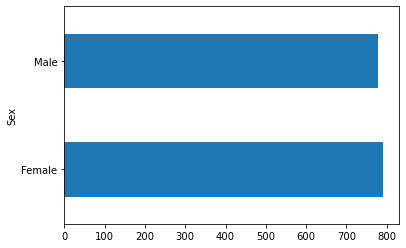

In [80]:
df_Influenza.plot(kind="barh", fontsize=10)

The highest Influenza death counts was for Females and it was 791 death counts

In [81]:
df_COVID_19 = df_copy.groupby('Sex')['COVID_19_Deaths'].max()
df_COVID_19

Sex
Female    21929
Male      15717
Name: COVID_19_Deaths, dtype: int32

<AxesSubplot:>

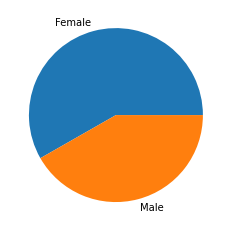

In [82]:
df_COVID_19.plot(kind="pie", label="")

The highest COVID_19 death counts was for Females and it was 21929 death counts

# What is the deadliest disease?

In [83]:
df.head()

,State,Sex,Age_group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Influenza_Deaths
0,United States,All,Under 1 year,9,6504,59,14
1,United States,All,1-4 years,6,1259,46,40
2,United States,All,5-14 years,13,1859,61,46
3,United States,All,15-24 years,132,11608,235,51
4,United States,All,25-34 years,732,24675,885,146


In [84]:
df.COVID_19_Deaths.max()

107997

In [85]:
df_copy.Pneumonia_Deaths.max()

20960

In [86]:
df.Influenza_Deaths.max()

6444

In [88]:
maximum_diseas = df.describe()
maximum_diseas

,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Influenza_Deaths
count,1416.000000,1.416000e+03,1416.000000,1416.000000
mean,609.524011,6.869159e+03,665.115819,35.211158
std,4928.015836,5.448094e+04,5324.668423,287.258766
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,3.300000e+01,0.000000,0.000000
50%,0.000000,3.040000e+02,16.000000,0.000000
75%,90.250000,2.014500e+03,164.250000,11.000000
max,107997.000000,1.215516e+06,117814.000000,6444.000000


<AxesSubplot:>

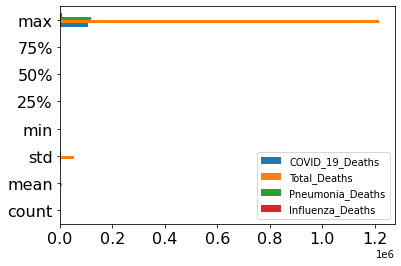

In [89]:
maximum_diseas.plot(kind="barh", fontsize=16)

The deadliest disease was (Pneumonia) and it has killed almost 117814

## Conclusions


1- The highest number of death counts is in The The United States which is 1215516  number of deaths and almost (53) states have zero death counts like Alabama, Alaska and Puerto.

2- (85 years old and over) is the age that had the highest number of (Total death counts) which is 376456.0 death count, and (1-4 years old) had the lowest number of (Total death) counts which is 1259.0 death count.

3- (85 years old and over) is the age that had the highest number of (Pneumonia death counts) which is (37172) death count, and (1-4 years) is the age that had the lowest number of (Pneumonia death counts) which is (46) death count

4- (75-84 years old) is the age that had the highest number of (Influenza death counts) which was (1423) death count and (Under 1 year) is the age that had the lowest number of (Influenza death counts) and it was (14) death count

5- (85 years old and over) is the age that had the highest number of (Covid_19 death counts) which was 35948 death count and (1-4 years old) for the lowest number of (Covid_19 death counts) and was 6 death count

6- The highest (total death counts) was for Females and it was 231482 death count

7- The highest (Pneumonia death counts) was for Females and it was 20960 death counts

8- The highest (COVID_19 death counts) was for Females and it was 21929 death counts

9- And finally, The deadliest disease was (Pneumonia) and it has killed almost 117814 death count

### Limitations


(Pneumonia and COVID-19 Deaths), (Pneumonia, Influenza, or COVID-19 Deaths), (Footnote) columns could not be used in analyzing because they were not accurate 